This notebook deals with the contents in Sections 4.4.1-4.4.11.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel

# Load and show data

In [2]:
df = pd.read_csv("./data/data-salary.txt")
print(df.count())
df.head(5)

X    20
Y    20
dtype: int64


,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


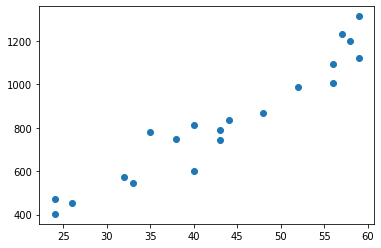

In [3]:
# Fig 4.2
plt.plot(df["X"], df["Y"], 'o')

# Run Stan

In [4]:
model = CmdStanModel(stan_file="model/model4-5.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chapter04/model/model4-5


CmdStanModel: name=model4-5
	 stan_file=/workdir/chapter04/model/model4-5.stan
	 exe_file=/workdir/chapter04/model/model4-5
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
data = {
    "N": len(df),
    "X": df["X"].values,
    "Y": df["Y"].values
}

In [6]:
fit = model.sample(data=data)  
# By default, cmdstanpy does not save warmup draws.
# To save warmup draws, set save_warmup=True in the sample method

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


# Access the result

In [7]:
type(fit) # See https://cmdstanpy.readthedocs.io/en/latest/api.html#cmdstanmcmc

cmdstanpy.stanfit.CmdStanMCMC

In [8]:
fit

CmdStanMCMC: model=model4-5 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmpycy0mm2w/model4-5-202010261229-1-hovf8fqm.csv
	/tmp/tmpycy0mm2w/model4-5-202010261229-2-bd8k1y6y.csv
	/tmp/tmpycy0mm2w/model4-5-202010261229-3-ko5n7wnc.csv
	/tmp/tmpycy0mm2w/model4-5-202010261229-4-l4ca4at7.csv
 output_files:
	/tmp/tmpycy0mm2w/model4-5-202010261229-1-hovf8fqm-stdout.txt
	/tmp/tmpycy0mm2w/model4-5-202010261229-2-bd8k1y6y-stdout.txt
	/tmp/tmpycy0mm2w/model4-5-202010261229-3-ko5n7wnc-stdout.txt
	/tmp/tmpycy0mm2w/model4-5-202010261229-4-l4ca4at7-stdout.txt

In [9]:
print(fit.chains)
print(fit.chain_ids)

4
[1, 2, 3, 4]


In [10]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 10)


In [11]:
fit.column_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'a',
 'b',
 'sigma')

In [12]:
fit.stan_variables()

{'a': array([  10.8026, -240.065 , -286.226 , ..., -164.251 ,   80.0225,
          67.4077]),
 'b': array([18.9266, 24.3885, 25.4486, ..., 22.1206, 17.5067, 17.3103]),
 'sigma': array([ 94.4451, 109.485 ,  88.4847, ..., 118.03  ,  73.4122,  72.3145])}

In [13]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

a (4000,)
b (4000,)
sigma (4000,)


In [14]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-93.7099,0.040973,1.35327,-96.2482,-93.3710,-92.21270,1090.86,3266.05,1.00310
a,-119.8590,2.312120,76.99470,-247.4010,-118.3060,3.55869,1108.92,3320.11,1.00083
b,21.9015,0.051438,1.72006,19.1252,21.8852,24.68670,1118.19,3347.89,1.00104
sigma,85.2005,0.412888,15.72110,63.6211,83.1496,113.18600,1449.78,4340.66,1.00243


# Diagnostics

In [15]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmpycy0mm2w/model4-5-202010261229-1-hovf8fqm.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-2-bd8k1y6y.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-3-ko5n7wnc.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-4-l4ca4at7.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmpycy0mm2w/model4-5-202010261229-1-hovf8fqm.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-2-bd8k1y6y.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-3-ko5n7wnc.csv, /tmp/tmpycy0mm2w/model4-5-202010261229-4-l4ca4at7.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Visualizing the samples


## density

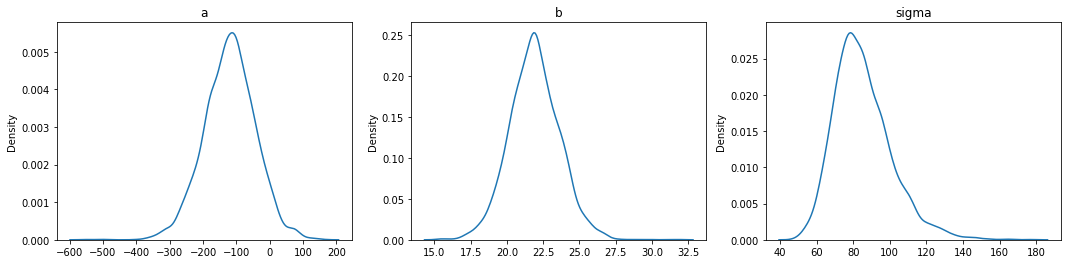

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for var_name, ax in zip(["a", "b", "sigma"], axes):
    sns.kdeplot(ax=ax, x=fit.stan_variable(var_name))
    ax.set_title(var_name)
fig.show()

## trace plot

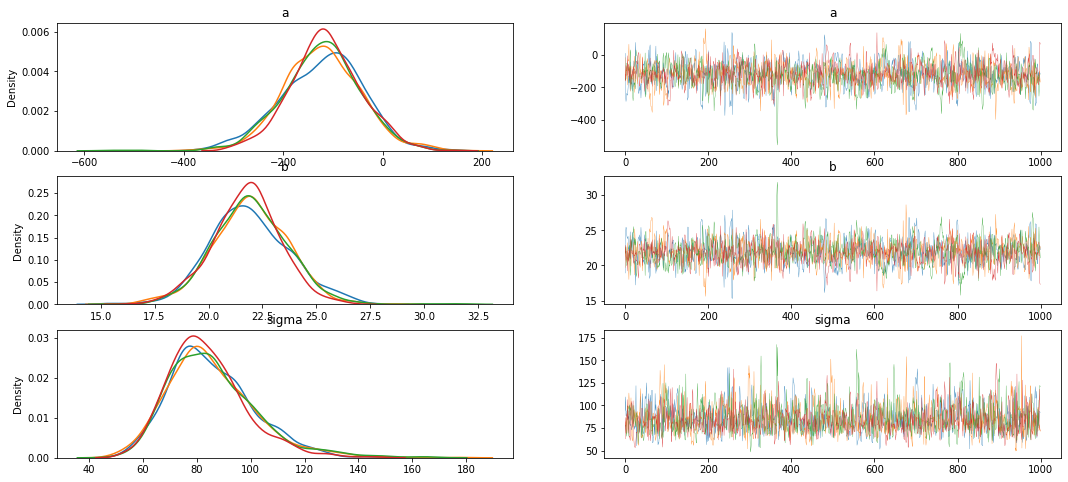

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 8))

for i, (var_name, ax_row) in enumerate(zip(["a", "b", "sigma"], axes)):
    ax_row[0].set_title(var_name)
    ax_row[1].set_title(var_name)
    
    for j in range(fit.chains):
        sns.kdeplot(ax=ax_row[0], x=fit.stan_variable(var_name)[j * fit.num_draws : (j + 1) * fit.num_draws], color=f"C{j}")
        ax_row[1].plot(fit.stan_variable(var_name)[j * fit.num_draws : (j + 1) * fit.num_draws], color=f"C{j}", linewidth=0.3) 

## pair plot

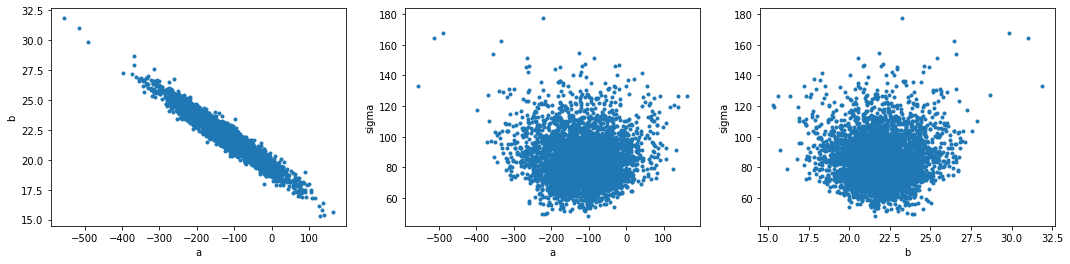

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for ax, varx, vary in zip(axes, ["a", "a", "b"], ["b", "sigma", "sigma"]):
    ax.plot(fit.stan_variable(varx), fit.stan_variable(vary), ".")
    ax.set_xlabel(varx)
    ax.set_ylabel(vary)

# Predictive distribution

Manually calculate predictive distribution from posterior samples

In [19]:
mcmc_samples = fit.stan_variables()
for k, v in mcmc_samples.items():
    print(k, v.shape)

a (4000,)
b (4000,)
sigma (4000,)


In [20]:
age_low = 23
age_high = 60
ages = np.arange(age_low, age_high + 1, 1)

N_mcmc = len(mcmc_samples["a"])
y_base_samples = np.zeros((len(ages), N_mcmc))
y_pred_samples = np.zeros((len(ages), N_mcmc))

for i, age in enumerate(ages):
    y_base_samples[i] = mcmc_samples["a"] + mcmc_samples["b"] * age
    y_pred_samples[i] = np.random.normal(loc=y_base_samples[i], scale=mcmc_samples["sigma"])

In [21]:
y_base_percentiles = np.percentile(y_base_samples, [2.5, 25.0, 50.0, 75.0, 97.5], axis=1)
y_pred_percentiles = np.percentile(y_pred_samples, [2.5, 25.0, 50.0, 75.0, 97.5], axis=1)

y_base_percentiles.shape, y_pred_percentiles.shape

((5, 38), (5, 38))

Text(0.5, 1.0, 'y')

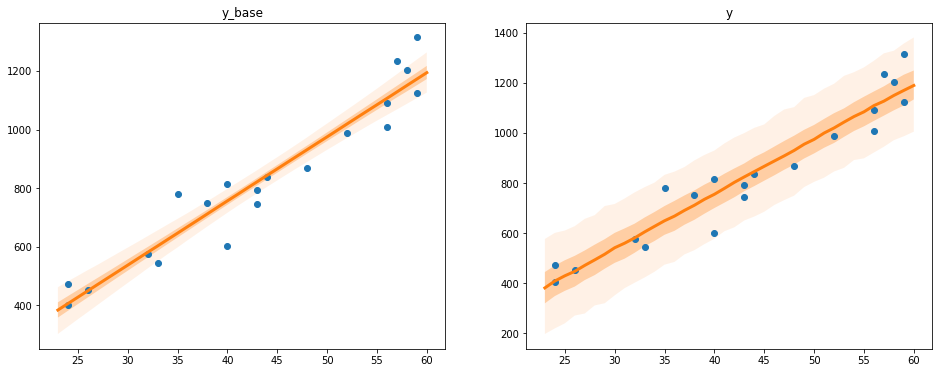

In [22]:
# Fig 4.8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax = axes[0]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(ages, y_base_percentiles[0], y_base_percentiles[4], facecolor="C1", alpha=0.1)
ax.fill_between(ages, y_base_percentiles[1], y_base_percentiles[3], facecolor="C1", alpha=0.3)
ax.plot(ages, y_base_percentiles[2], color="C1", linewidth=3)
ax.set_title("y_base")

ax = axes[1]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(ages, y_pred_percentiles[0], y_pred_percentiles[4], facecolor='C1', alpha=0.1)
ax.fill_between(ages, y_pred_percentiles[1], y_pred_percentiles[3], facecolor='C1', alpha=0.3)
ax.plot(ages, y_pred_percentiles[2], color="C1", linewidth=3)
ax.set_title("y")